###  Case study analysis
State the key points that you found in the case and how you intend to deal with them appropriately to address the client's needs. (You can include more than four points.)

200-300 words

1. It is important to have an **unbiased** model that can identify all possible fraud cases. In order to have an unbiased model, the training data used needs to be representative of a whole populations. We need to avoid sampling biase or over sampling a specific class/populations. We also need to avoid using proxies for sensitive attributes (such as race and gender) as these proxies can lead to biaseness in the model. We also need to addresss class imbalance problem to mitigate biaseness in model. We need to do adjustments on data processing or model tuning even **after** model deployment. Machine Learning modelling project is an iterative process and model needs to be constantly tuned to keep up with changes. e.g. A machine learning model trained 10 years ago may not be applicable in today's demographics and may be highly biased. 

2. The company wants to avoid falsefully identify an innocent customers as fraudulent because this will cause customer stress and lead to losing customers. This means we need to lower the number of false positive cases and choose metrics that include false positive cases in our model evaluation metrics. 

3. The company wants to be able to identify almost all of the fraudulent cases so we need to ensure TP rate must be high which means our model performance metrics need to take into TP into account as well. 


4. The balaned error rate of 5% is quite a high requirement and will be hard to acheive. However, this sentence could be a clue that the company requires us to use Balance Accuracy as a metrics to measure the classificaton accuracy. 

5. We are given a fraud detection project and often the data given in such project are usually have a class imbalance problem. We should use stratified sampling when splitting data into training and testing set to ensure both test and training are representative of the whole datasets. Also, if class imbalance is severe, we should consider over sampling underepresented class.


#### Load and save data in the correct format first

In [2]:
# Import all data 


path_directory='Traindata_with_Target.csv'

path_directory2='Train_Demographics.csv'

path_directory3='Train_Vehicle.csv'

path_directory4='Train_Claim.csv'

path_directory5='Train_Policy.csv'

In [3]:
import pandas as pd
import numpy as np

IDtarget=pd.read_csv(path_directory)
demographics=pd.read_csv(path_directory2)
vehicle=pd.read_csv(path_directory3)

claim=pd.read_csv(path_directory4)

policy=pd.read_csv(path_directory5)

In [4]:
IDtarget=IDtarget.sort_values(by=['CustomerID']) 
demographics=demographics.sort_values(by=['CustomerID'])
claim=claim.sort_values(by=['CustomerID'])
policy=policy.sort_values(by=['CustomerID'])

In [5]:
print(len(pd.unique(claim['IncidentAddress'])))

1000


In [6]:
IDtarget=IDtarget.sort_values(by=['CustomerID']) 
demographics=demographics.sort_values(by=['CustomerID'])
claim=claim.sort_values(by=['CustomerID'])
policy=policy.sort_values(by=['CustomerID'])

In [7]:
vehicle=vehicle.sort_values(by=['CustomerID','VehicleAttribute']) # so each customer has a few registered vehicles


customers=pd.unique(vehicle['CustomerID'])

vehicleattributes=pd.unique(vehicle['VehicleAttribute'])

vehicleID=[]
vehicleMake=[]
vehicleModel=[]
vehicleYOM=[]

for i in range(0,28836):
    vehicleID.append((vehicle['VehicleAttributeDetails']).iloc[i*4])
    vehicleMake.append((vehicle['VehicleAttributeDetails']).iloc[i*4+1])
    vehicleModel.append((vehicle['VehicleAttributeDetails']).iloc[i*4+2])
    vehicleYOM.append((vehicle['VehicleAttributeDetails']).iloc[i*4+3])
    

In [8]:
newvehicle=[]
for i in range(0,28836):
    newvehicle.append(vehicle.iloc[i*4])

In [9]:

customerID=np.array(newvehicle)
newvehicledf=pd.DataFrame(newvehicle)

In [10]:
newvehicledf=newvehicledf.drop(['VehicleAttribute'],axis=1)

In [11]:
newvehicledf = newvehicledf.rename(columns={'VehicleAttributeDetails': 'VehicleID'})

In [12]:
newvehicledf.head()

,CustomerID,VehicleID
5865,Cust10000,Vehicle26917
1112,Cust10001,Vehicle15893
84853,Cust10002,Vehicle5152
2621,Cust10003,Vehicle37363
74500,Cust10004,Vehicle28633


In [13]:
newvehicledf.insert(loc=2,column='VehicleMake',value=vehicleMake)
newvehicledf.insert(loc=3,column='VehicleModel',value=vehicleModel)
newvehicledf.insert(loc=3,column='VehicleYOM',value=vehicleYOM)

In [14]:
comparedemographics=pd.merge(demographics,IDtarget,on=['CustomerID'])
compareclaim=pd.merge(claim,IDtarget,on=['CustomerID'])
comparepolicy=pd.merge(policy,IDtarget,on=['CustomerID'])
comparevehicle=pd.merge(newvehicledf,IDtarget, on=['CustomerID'])

#### Before we do any pre-processing, let's do some data explorations by plotting a few bar graphs and look for class imbalance, data distributions, types of attributes and correlation matrix. 

(array([21051.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7785.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

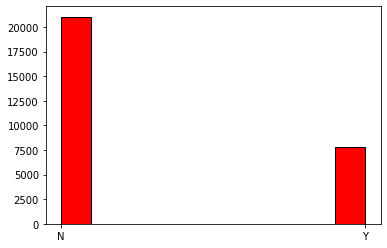

In [15]:
plt.hist(IDtarget['ReportedFraud'],color='red',edgecolor='black')

#### Definitely class imbalance between fraudulent and non fradulent cases. More non-fradulent than fraudulent cases.  We need to deal with class imbalance later by undersampling the majority class.

#### Now look at correlation matrix to get a rough idea of which attributes are important to predicting fraud and those that aren't (low correlation with Reported Fraud)

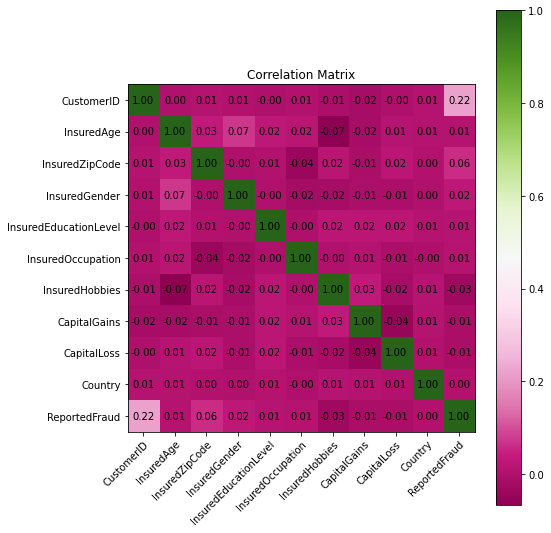

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


data_demographics= comparedemographics.replace('?',np.nan)


encoder = LabelEncoder()
data_encoded = data_demographics.apply(encoder.fit_transform)

correlation_matrix = data_encoded.corr()
fig, ax = plt.subplots(figsize=(8, 8))

heatmap = ax.imshow(correlation_matrix, cmap='PiYG')

cbar = plt.colorbar(heatmap)

ax.set_xticks(np.arange(len(data_encoded.columns)))
ax.set_yticks(np.arange(len(data_encoded.columns)))
ax.set_xticklabels(data_encoded.columns)
ax.set_yticklabels(data_encoded.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


for i in range(len(data_encoded.columns)):
    for j in range(len(data_encoded.columns)):
        text = ax.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                       ha="center", va="center", color="black")

ax.set_title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [17]:
print(len(pd.unique(demographics["InsuredZipCode"])))

995


 #### Observation from graph : country has 0 impact on the reported fraud and all cases from India so country can't help with prediction. should drop country as a feature. 

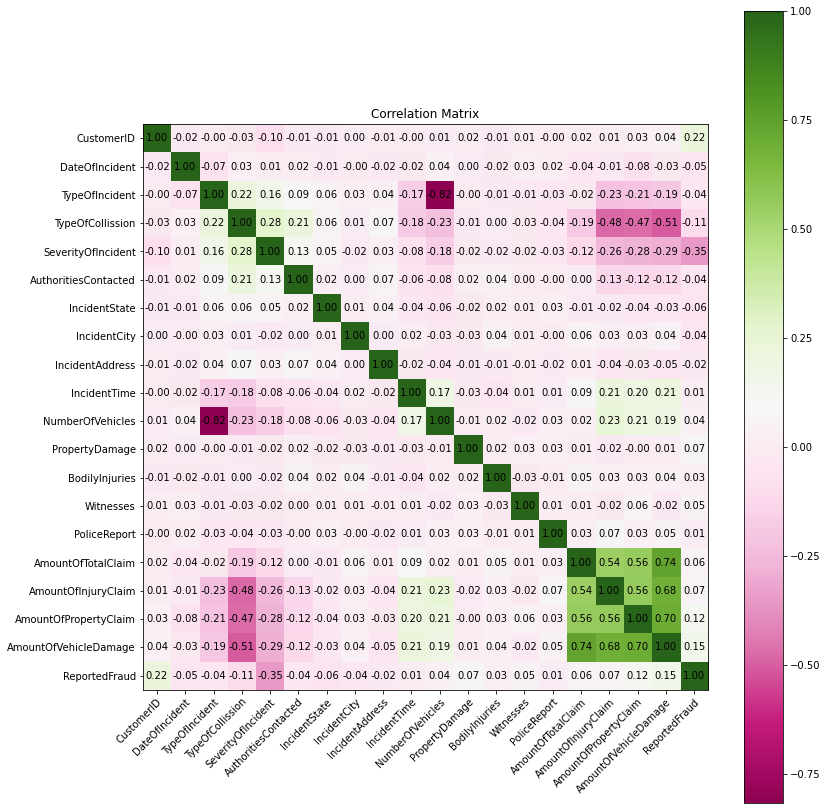

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


data_claim = compareclaim.replace('?',np.nan)

encoder = LabelEncoder()
data_encoded = data_claim.apply(encoder.fit_transform)
correlation_matrix = data_encoded.corr()
fig, ax = plt.subplots(figsize=(12, 12))


heatmap = ax.imshow(correlation_matrix, cmap='PiYG')

cbar = plt.colorbar(heatmap)

ax.set_xticks(np.arange(len(data_encoded.columns)))
ax.set_yticks(np.arange(len(data_encoded.columns)))
ax.set_xticklabels(data_encoded.columns)
ax.set_yticklabels(data_encoded.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


for i in range(len(data_encoded.columns)):
    for j in range(len(data_encoded.columns)):
        text = ax.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                       ha="center", va="center", color="black")

ax.set_title("Correlation Matrix")


plt.tight_layout()
plt.show()


#### Amount of TotalClaim, amountOfInjuryClaim, AmountOfPropertyClaim and AmountOFVehicleDamage are highly correlated. We might need to use PCA to reduce their dimensionality later. 

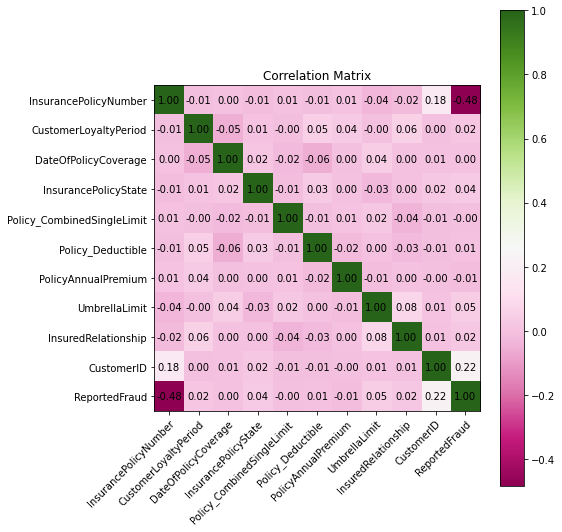

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data_policy = comparepolicy.replace('?',np.nan)

encoder = LabelEncoder()
data_encoded = data_policy.apply(encoder.fit_transform)

correlation_matrix = data_encoded.corr()

fig, ax = plt.subplots(figsize=(8, 8))

heatmap = ax.imshow(correlation_matrix, cmap='PiYG')


cbar = plt.colorbar(heatmap)


ax.set_xticks(np.arange(len(data_encoded.columns)))
ax.set_yticks(np.arange(len(data_encoded.columns)))
ax.set_xticklabels(data_encoded.columns)
ax.set_yticklabels(data_encoded.columns)


plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


for i in range(len(data_encoded.columns)):
    for j in range(len(data_encoded.columns)):
        text = ax.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                       ha="center", va="center", color="black")


ax.set_title("Correlation Matrix")


plt.tight_layout()
plt.show()

#### can remove dateofpolicycoverage and combinedsinglelimit since it has 0 correlation with reported fraud

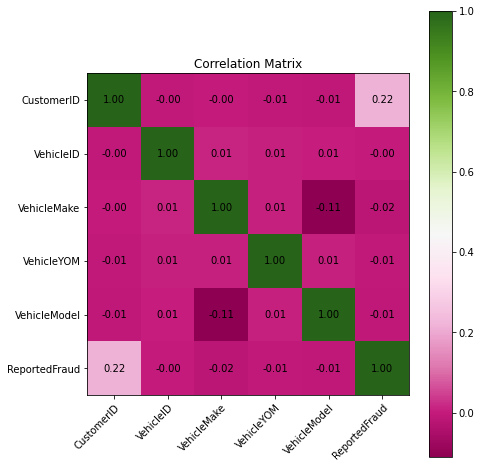

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder




data_vehicle= comparevehicle.replace('?',np.nan)


encoder = LabelEncoder()
data_encoded = data_vehicle.apply(encoder.fit_transform)

correlation_matrix = data_encoded.corr()


fig, ax = plt.subplots(figsize=(7, 7))
heatmap = ax.imshow(correlation_matrix, cmap='PiYG')


cbar = plt.colorbar(heatmap)


ax.set_xticks(np.arange(len(data_encoded.columns)))
ax.set_yticks(np.arange(len(data_encoded.columns)))
ax.set_xticklabels(data_encoded.columns)
ax.set_yticklabels(data_encoded.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


for i in range(len(data_encoded.columns)):
    for j in range(len(data_encoded.columns)):
        text = ax.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                       ha="center", va="center", color="black")


ax.set_title("Correlation Matrix")


plt.tight_layout()
plt.show()

#### should drop vehicleID again it has 0 correlation with ReportedFraud



#### We now should merge the data to get them ready for pre-processing 

In [21]:
df1 = pd.merge(claim,demographics, on = ['CustomerID'])
df2=pd.merge(df1,policy, on=['CustomerID'])
df3=pd.merge(df2,newvehicledf,on=['CustomerID'])
tottrain=pd.merge(df3,IDtarget,on=['CustomerID'])  # infer vehicle Model check the model 

In [22]:
tottrain.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleYOM,VehicleModel,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,2008,A5,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,2006,A5,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,1999,Jetta,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,2003,Jetta,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,2010,CRV,N


In [23]:
print(len(pd.unique(tottrain['InsurancePolicyNumber'])))

28836


###  a) Preparing the labels appropriately if necessary 

The labels for supervised learning is in the Traindata_with_Target.csv folder, which is named IDtarget. It is under ReportedFraud and labeled as either Y or N. I would like to change it to 1 or 0 where Y=yes=1 and N=no=0

In [24]:
tottrain.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleYOM,VehicleModel,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,2008,A5,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,2006,A5,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,1999,Jetta,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,2003,Jetta,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,2010,CRV,N


In [25]:

labels=tottrain['ReportedFraud'].map(dict(Y=1, N=0))

In [26]:
tottrain['ReportedFraud']=labels

In [27]:
tottrain.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleYOM,VehicleModel,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,2008,A5,0
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,2006,A5,0
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,1999,Jetta,0
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,2003,Jetta,0
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,2010,CRV,0


###  b) Removing synonymous and noisy attributes if necessary 

From the correlation Matrix, I think I should:

1. Remove vehicleID as it does not contribute to any learning/meaning

2. Remove CustomerID as it also does not contribute to any learning/meaning

3. Remove Country because everyone is in India and also does not contribute to any learning/meaning. Correlation between country and reported fraud is 0.

4. Remove InsurancePolicyNumber as it does not contribute to any learning/meaning

5. Use PCA to reduce dimensionallty of highly correlated or symnonymous attributes. I move this step to later stages because I need to deal with the missing data in AmountOfTotalClaim before I can reduce dimensionality of it with other attributes. 

In [28]:
tottrain=tottrain.drop(['CustomerID'],axis=1)

In [29]:
tottrain=tottrain.drop(['VehicleID'],axis=1)
tottrain=tottrain.drop(['Country'],axis=1)
tottrain=tottrain.drop(['InsurancePolicyNumber'],axis=1)

In [30]:
tottrain.head()

,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleYOM,VehicleModel,ReportedFraud
0,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,...,State1,100/300,1000,1632.73,0,not-in-family,Audi,2008,A5,0
1,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,...,State1,100/300,1000,1255.19,0,not-in-family,Audi,2006,A5,0
2,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,...,State3,500/1000,617,1373.38,0,wife,Volkswagen,1999,Jetta,0
3,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,...,State2,500/1000,722,1337.60,0,own-child,Volkswagen,2003,Jetta,0
4,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,...,State2,100/300,500,1353.73,4279863,unmarried,Toyota,2010,CRV,0


In [31]:
tottrain.drop(['IncidentAddress'],axis=1,inplace=True)

In [32]:
tottrain.drop(['InsuredZipCode'],axis=1,inplace=True)

#### Rationale:  incidenaddres has low correlation with reported fraud and the information on location is already embedded in the incidentCity and incidentState. As explained before, insuredZipCodes has 995 unique zipcodes, it will cause the final training to have too many number of features and could lead to overfitting. 

## Train_test split before any further preprocessing steps to prevent data leakage

Before doing any more pre-processing that can cause data leakage, 

Need to do train-test split first

Below are the few pointers I took note of :

1. Use 70% of data as training and 30% as test set. test_size=0.3

2. I choose startified sampling since we have a class imbalance data set. There are way more non-fraud data than fraud data. Stratified sampling retain the proportion of classes in training.

In [33]:
X = tottrain.drop(['ReportedFraud'],axis=1)
y = tottrain['ReportedFraud']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 100,stratify=y)


In [34]:
print(np.sum(y_test))
print(len(y_test))
np.sum(y_test)/(len(y_test))

2336
8651


0.2700265865217894

In [35]:
print(np.sum(y_train))
print(len(y_train))
np.sum(y_train)/(len(y_train))

5449
20185


0.2699529353480307

The startified sampling successfully preserve proportion of 2 classes in the data.

###  c) Dealing with missing values if necessary 



#### 1.  In Claim, the AmountOfTotalClaim has missing values 'MISSEDDATA'. After checking, AmountOfTotalClaim is simply a sum of AmountOfInjuryClaim, AmountOfPropertyClaim and AmountOfVehicleDamage. I will input the missing data accordingly.

In [36]:
X_train['AmountOfTotalClaim'].describe()

count          20185
unique         16576
top       MISSEDDATA
freq              36
Name: AmountOfTotalClaim, dtype: object

In [37]:
def get_new_totclaim (claim):
    newtotalclaims=[]
    for i in range(len(claim['AmountOfTotalClaim'])):
        if claim['AmountOfTotalClaim'].iloc[i]=='MISSEDDATA':
            totalclaim=claim['AmountOfInjuryClaim'].iloc[i]+claim['AmountOfPropertyClaim'].iloc[i]+claim['AmountOfVehicleDamage'].iloc[i]
            newtotalclaims.append(totalclaim)
        else:
            newtotalclaims.append(claim['AmountOfTotalClaim'].iloc[i])
    return newtotalclaims

In [38]:
traintotclaim=get_new_totclaim(X_train)

In [39]:
X_train['AmountOfTotalClaim']=traintotclaim

In [40]:
testtotclaim=get_new_totclaim(X_test)

In [41]:
X_test['AmountOfTotalClaim']=testtotclaim

#### 2. dealing with Witnesses

#### First need to look at the distribution of the no.of witness in the dataset.

#### Check if there is a high correlation between missing witness value and fraud detected


In [42]:
totwitness=claim['Witnesses']

In [43]:
claim['Witnesses'].describe()

count     28836
unique        5
top           2
freq       8449
Name: Witnesses, dtype: object

(array([6128.,    0., 8345.,    0.,    0., 5868.,    0., 8449.,    0.,
          46.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

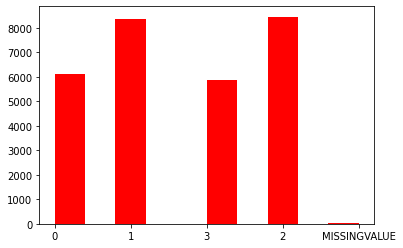

In [44]:
plt.hist(totwitness,color='red')

1 witness and 2 witnesses are both the very frequent occurrences, even though 2 is slightly more than 1

Text(0, 0.5, 'no. of cases with missing values for witness')

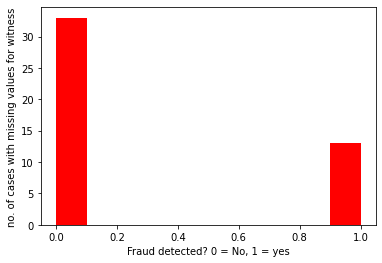

In [45]:

#fraud=[]
x=[]
y=[]
for i in range(len(claim)):
    if claim['Witnesses'].iloc[i]=='MISSINGVALUE':
        x.append(1)
        y.append(int(labels[i]))
        #fraud.append(claimnew['ReportedFraud'].iloc[i])

        #fraud.append()


plt.hist(y,color='red') 
plt.xlabel('Fraud detected? 0 = No, 1 = yes')
plt.ylabel('no. of cases with missing values for witness')
# incidents without witness does not indicates fraudulent behavior

Conclusion: Incidents with missing witness value does not indicate fraudulent behaviour. Should just input MISSINGVALUE wiht the most frequent witness number

In [46]:
X_train['Witnesses'].describe()

count     20185
unique        5
top           1
freq       5889
Name: Witnesses, dtype: object

In [47]:
def get_witness(claimnew):
    newwitness=[]
    for i in range(len(claimnew)):
        if claimnew['Witnesses'].iloc[i]=='MISSINGVALUE':
            newwitness.append(claim['Witnesses'].mode()[0])

        else:
            newwitness.append(claimnew['Witnesses'].iloc[i])
    return newwitness

In [48]:
trainwitness=get_witness(X_train)
testwitness=get_witness(X_test)

In [49]:
X_train['Witnesses']=trainwitness
X_test['Witnesses']=testwitness

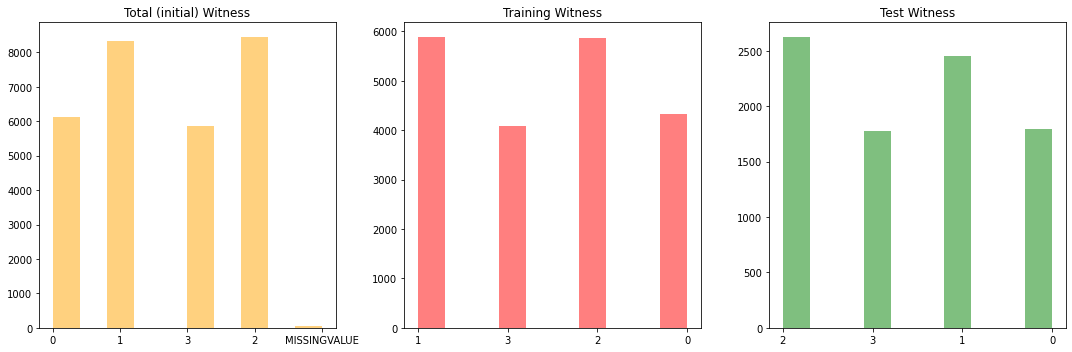

In [50]:

import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(totwitness, color='orange', alpha=0.5)
axs[0].set_title('Total (initial) Witness')


axs[1].hist(X_train['Witnesses'], color='red', alpha=0.5)
axs[1].set_title('Training Witness')

axs[2].hist(X_test['Witnesses'], color='green', alpha=0.5)
axs[2].set_title('Test Witness')

plt.tight_layout()

plt.show()



###### The distribution of data did not change much after imputations. So it is a alright way to deal with missing data.

 #### 3. Deal with missing Police Report Type of Collision and Property damage
 
 1/3 of the data is missing and marked with ?
 
Replace "?" with NA/or none

In [51]:
X_train["PoliceReport"].describe()

count     20185
unique        3
top          NO
freq       6931
Name: PoliceReport, dtype: object

In [52]:
X_test["PoliceReport"].describe()

count     8651
unique       3
top         NO
freq      2967
Name: PoliceReport, dtype: object

In [53]:
Policereport = X_train["PoliceReport"].replace('?','unknown')

In [54]:
PolicereportTest=X_test["PoliceReport"].replace("?",'unknown')

In [55]:
X_train['PoliceReport']=Policereport

In [56]:
X_train['PoliceReport'].describe()

count     20185
unique        3
top          NO
freq       6931
Name: PoliceReport, dtype: object

In [57]:
X_train["PoliceReport"]

17250        YES
26387        YES
14505         NO
14460         NO
17185        YES
          ...   
6087          NO
7763     unknown
22309        YES
9047          NO
19769    unknown
Name: PoliceReport, Length: 20185, dtype: object

In [58]:
X_test["PoliceReport"]=PolicereportTest

In [59]:
X_test["PoliceReport"].describe()

count     8651
unique       3
top         NO
freq      2967
Name: PoliceReport, dtype: object

In [60]:
X_test["PoliceReport"]

3673     unknown
10230    unknown
6097         YES
2836         YES
9848     unknown
          ...   
22992        YES
28381        YES
18236        YES
6576         YES
10710         NO
Name: PoliceReport, Length: 8651, dtype: object

#### 4. type of collisions -  mode imputation

In [61]:
X_train["TypeOfCollission"].describe()

count              20185
unique                 4
top       Rear Collision
freq                5950
Name: TypeOfCollission, dtype: object

In [62]:
X_test["TypeOfCollission"].describe()

count               8651
unique                 4
top       Rear Collision
freq                2611
Name: TypeOfCollission, dtype: object

In [63]:
def get_missing(data):
    newmissing=[]
    for i in range(len(data)):
        if data['TypeOfCollission'].iloc[i]=='?':
            newmissing.append(data['TypeOfCollission'].mode()[0])

        else:
            newmissing.append(data['TypeOfCollission'].iloc[i])
    return newmissing

In [64]:
coltrain=get_missing(X_train)
coltest=get_missing(X_test)

In [65]:
X_train["TypeOfCollission"]=coltrain
X_test["TypeOfCollission"]=coltest

In [66]:
X_train["TypeOfCollission"].describe()

count              20185
unique                 3
top       Rear Collision
freq                9548
Name: TypeOfCollission, dtype: object

In [67]:
X_test["TypeOfCollission"].describe()

count               8651
unique                 3
top       Rear Collision
freq                4175
Name: TypeOfCollission, dtype: object

#### 5. Dealing with VehicleMake which contains missing ???, rather than using mode imputations, we can infer VehicleMake from Vehicle model 

In [68]:
column_name = 'VehicleMake'

# Use the str.contains() method to check for the occurrence of "???" in the specified column
count = X_train[X_train[column_name].str.contains('\?\?\?', na=False)].shape[0]

print(f"Number of rows with '???': {count}")


Number of rows with '???': 36


In [69]:
missingtrain=[]
for i in range(len(X_train)):
    if X_train["VehicleMake"].iloc[i]=="???":
        print((X_train["VehicleModel"].iloc[i]))

CRV
C300
CRV
E400
MDX
Pathfinder
RAM
A3
M5
Highlander
A3
Impreza
92x
Jetta
Passat
Civic
Jetta
Grand Cherokee
A3
Neon
Tahoe
Neon
X6
Silverado
A3
F150
Corolla
Civic
TL
Passat
X6
A5
3 Series
RAM
CRV
A5


In [70]:
replacement_mapping = {
    'CRV': 'Honda',
    'C300': 'Mercedes',
    'E400': 'Mercedes',
    'MDX': 'Accura',
    'Pathfinder': 'Nissan',
    'RAM': 'Dodge',
    'A3': 'Audi',
    'M5': 'BMW',
    'Impreza': 'Subaru',
    '92x': 'Saab',
    'Jetta': 'Volkswagen',
    'Passat': 'Volkswagen',
    'Civic': 'Honda',
    'Grand Cherokee': 'Jeep',
    'Neon': 'Dodge',
    'Tahoe': 'Chevrolet',
    'X6': 'BMW',
    'Silverado': 'Chevrolet',
    'F150': 'Ford',
    'Corolla': 'Toyota',
    'TL': 'Acura',
    '3 Series': 'BMW',
    'Highlander': 'Toyota',
    'A5': 'Audi'
}

mask = X_train["VehicleMake"] == "???"
X_train.loc[mask, "VehicleMake"] = X_train.loc[mask, "VehicleModel"].map(replacement_mapping).fillna(X_train.loc[mask, "VehicleMake"])

In [71]:
X_train["VehicleMake"].describe()

count     20185
unique       16
top        Saab
freq       1670
Name: VehicleMake, dtype: object

In [72]:
missingtest=[]
for i in range(len(X_test)):
    if X_test["VehicleMake"].iloc[i]=="???":
        missingtest.append((X_test["VehicleModel"].iloc[i]))

In [73]:
print((missingtest))

['3 Series', '95', 'Maxima', 'RAM', 'Corolla', 'Tahoe', 'MDX', 'Camry', 'Escape', 'Grand Cherokee', 'M5', 'TL', 'X6', 'Jetta']


In [74]:
replacement_mapping = {
    'CRV': 'Honda',
    '3 Series': 'BMW',
    '95': 'Saab',
    'MDX': 'Accura',
    'Corolla': 'Toyota',
    'Tahoe': 'Chevrolet',
    'M5': 'BMW',
    'Escape':'Ford',
    '92x': 'Saab',
    'Jetta': 'Volkswagen',
    'Grand Cherokee': 'Jeep',
    'Tahoe': 'Chevrolet',
    'X6': 'BMW',
    'TL': 'Accura',
    'Maxima':'Nissan',
    'RAM':'Dodge',
    'Camry':"Toyota"
    
}

mask = X_test["VehicleMake"] == "???"
X_test.loc[mask, "VehicleMake"] = X_test.loc[mask, "VehicleModel"].map(replacement_mapping).fillna(X_test.loc[mask, "VehicleMake"])





In [75]:
print(pd.unique(X_test["VehicleMake"]))

['Nissan' 'Mercedes' 'Chevrolet' 'Jeep' 'Accura' 'Ford' 'Dodge' 'BMW'
 'Honda' 'Audi' 'Toyota' 'Volkswagen' 'Saab' 'Suburu']


In [76]:
X_train["VehicleMake"].describe()

count     20185
unique       16
top        Saab
freq       1670
Name: VehicleMake, dtype: object

In [77]:
pd.unique(X_train["VehicleMake"])

array(['Dodge', 'BMW', 'Nissan', 'Jeep', 'Saab', 'Volkswagen', 'Accura',
       'Suburu', 'Mercedes', 'Ford', 'Chevrolet', 'Honda', 'Audi',
       'Toyota', 'Subaru', 'Acura'], dtype=object)

In [78]:
print(len(X_test["VehicleMake"]))

8651


In [79]:
pd.unique(X_test["VehicleMake"])

array(['Nissan', 'Mercedes', 'Chevrolet', 'Jeep', 'Accura', 'Ford',
       'Dodge', 'BMW', 'Honda', 'Audi', 'Toyota', 'Volkswagen', 'Saab',
       'Suburu'], dtype=object)

##### VehicleMake is more correlated to reported fraud than Vehicle model (from correlation matrix above). Hence we could drop Vehicle Model to reduce number of features to prevent overfitting later. 

In [80]:
X_train.drop(columns='VehicleModel',inplace=True)

X_test.drop(columns='VehicleModel',inplace=True)

#### 6. dealing with PolicyAnnualPremium, replace missing values with mean

##### Special attention! need to get the average after removing all of the -1 ones which messed up and brings down the average. Filter out all data without -1 and that will be true mean or true average

In [81]:
X_train["PolicyAnnualPremium"].describe()

count    20185.000000
mean      1255.620205
std        223.859433
min         -1.000000
25%       1123.050000
50%       1265.510000
75%       1396.690000
max       2047.590000
Name: PolicyAnnualPremium, dtype: float64

In [82]:
trainavg=[]
for i in range(len(X_train)):
    if X_train["PolicyAnnualPremium"].iloc[i]!=-1.00:
        trainavg.append(X_train["PolicyAnnualPremium"].iloc[i])

In [83]:
np.mean(trainavg)

1261.8767154592983

In [84]:
testavg=[]
for i in range(len(X_test)):
    if X_test["PolicyAnnualPremium"].iloc[i]!=-1.00:
        testavg.append(X_test["PolicyAnnualPremium"].iloc[i])

In [85]:
np.mean(testavg)

1261.2965853658538

###### train mean is 1261.88 and test mean is 1261.30

In [86]:
X_train['PolicyAnnualPremium'] = X_train['PolicyAnnualPremium'].replace(-1.00, 1261.88)

## make sure the decimal point must match

In [87]:
X_test['PolicyAnnualPremium'] = X_test['PolicyAnnualPremium'].replace(-1.00, 1261.30)


In [88]:
X_train['PolicyAnnualPremium'].describe()

count    20185.000000
mean      1261.876732
std        205.549503
min        436.280000
25%       1126.150000
50%       1265.510000
75%       1396.690000
max       2047.590000
Name: PolicyAnnualPremium, dtype: float64

In [89]:
X_test['PolicyAnnualPremium'].describe()

count    8651.000000
mean     1261.296602
std       203.328576
min       532.040000
25%      1123.480000
50%      1264.640000
75%      1396.460000
max      2041.820000
Name: PolicyAnnualPremium, dtype: float64

#### 7. Dealing with IncidentTime

##### More appropriate to use mode imputations since it could be possible that a specific time could be more prone to incidents or accidents happening. For example in the evening, the accidents happening could be more frequent.

In [90]:
X_train['IncidentTime'].mode()

0    17
dtype: int64

In [91]:
X_test['IncidentTime'].mode()

0    16
dtype: int64

In [92]:
column_name='IncidentTime'

In [93]:
count = X_train[X_train[column_name].isin([17.0])]  # For a float value
# OR
count = X_train[X_train[column_name].isin([17.0])]    # For an integer value

print(len(count))

1123


In [94]:
X_train['IncidentTime'] = X_train['IncidentTime'].replace(-5, 17)


In [95]:
X_test['IncidentTime']=X_test['IncidentTime'].replace(-5,16)

In [96]:
X_train["IncidentTime"].describe()

count    20185.000000
mean        11.772108
std          6.145190
min          0.000000
25%          6.000000
50%         12.000000
75%         17.000000
max         23.000000
Name: IncidentTime, dtype: float64

In [97]:
X_test["IncidentTime"].describe()

count    8651.000000
mean       11.762686
std         6.153694
min         0.000000
25%         6.000000
50%        12.000000
75%        17.000000
max        23.000000
Name: IncidentTime, dtype: float64

#### 8. Dealing with Property Damage 

we are going to create another category for missing data in property damage. There is a significant data missing in Property Damage and the correlation between Property Damage and Reported Fraud is high. So we can't just do mode imputation for Property Damage. 

In [98]:
pd.unique(X_train["PropertyDamage"])

array(['NO', 'YES', '?'], dtype=object)

In [99]:
X_train['PropertyDamage'] = X_train['PropertyDamage'].replace('?', 'unknown')
X_test['PropertyDamage'] = X_test['PropertyDamage'].replace('?', 'unknown')


#### 9.dealing with gender

##### It won't be appropriate to do mode imputation for gender.  Individuals with ? could be transgender or unknown. so use another category for "?". We should not assume gender is binary and need to replace "?"with "Other".

In [100]:
pd.unique(X_train["InsuredGender"])

array(['MALE', 'FEMALE', nan], dtype=object)

In [101]:
X_train['InsuredGender'] = X_train['InsuredGender'].replace(np.nan, 'other')
X_test['InsuredGender'] = X_test['InsuredGender'].replace(np.nan, 'other')

### d) Other 

### 1)dealing with Ordinal Data

#### rank serverity of incidents based on Trivial Damage = 1, minor Damage=2 , major Damage =3 and total loss=4


In [102]:
pd.unique(X_test ["SeverityOfIncident"])

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [103]:

# Define the desired numerical mapping for specific categories
category_mapping = {'Trivial Damage': 1, 'Minor Damage': 2, 'Major Damage': 3, 'Total Loss': 4}

# Create a new column with the mapped values
X_train['SeverityOfIncident'] = X_train['SeverityOfIncident'].map(category_mapping)

print(X_train['SeverityOfIncident'])

17250    4
26387    3
14505    1
14460    4
17185    4
        ..
6087     2
7763     4
22309    3
9047     3
19769    1
Name: SeverityOfIncident, Length: 20185, dtype: int64


In [104]:
X_test['SeverityOfIncident'] = X_test['SeverityOfIncident'].map(category_mapping)

print(X_test['SeverityOfIncident'])

3673     3
10230    3
6097     2
2836     4
9848     2
        ..
22992    2
28381    3
18236    1
6576     3
10710    3
Name: SeverityOfIncident, Length: 8651, dtype: int64


### 2) dealing with dates


In [105]:
X_train["DateOfIncident"]

17250    2015-02-13
26387    2015-01-09
14505    2015-01-01
14460    2015-01-16
17185    2015-02-18
            ...    
6087     2015-02-07
7763     2015-01-22
22309    2015-02-09
9047     2015-02-08
19769    2015-02-05
Name: DateOfIncident, Length: 20185, dtype: object

### Convert to day of the week

In [106]:
X_train["DateOfIncident"]=pd.to_datetime(X_train["DateOfIncident"])

X_train["Day_of_week"]=X_train["DateOfIncident"].dt.dayofweek





In [107]:
X_train['day_name'] = X_train['DateOfIncident'].dt.day_name()

In [108]:
X_test["DateOfIncident"]=pd.to_datetime(X_test["DateOfIncident"])

X_test["Day_of_week"]=X_test["DateOfIncident"].dt.dayofweek

X_test['day_name'] = X_test['DateOfIncident'].dt.day_name()

In [109]:


# Convert the dates column to datetime format
X_train['DateOfIncident'] = pd.to_datetime(X_train['DateOfIncident'])
X_test['DateOfIncident'] = pd.to_datetime(X_test['DateOfIncident'])

# Extract year, month, and day into separate columns
X_train['yearOfIncident'] = X_train['DateOfIncident'].dt.year
X_train['monthOfIncident'] = X_train['DateOfIncident'].dt.month
#X_train['dayOfIncident'] = X_train['DateOfIncident'].dt.day



In [110]:
X_test['yearOfIncident'] = X_test['DateOfIncident'].dt.year
X_test['monthOfIncident'] = X_test['DateOfIncident'].dt.month

#X_test['dayOfIncident'] = X_test['DateOfIncident'].dt.day

In [111]:
X_train=X_train.drop(['DateOfIncident'],axis=1)
X_test=X_test.drop(["DateOfIncident"],axis=1)

In [112]:
X_train=X_train.drop(['Day_of_week'],axis=1)
X_test=X_test.drop(["Day_of_week"],axis=1)

In [113]:
datecolumns=['day_name','monthOfIncident']

In [114]:
datescorr=pd.DataFrame(X_train[datecolumns])

In [115]:
datescorr["ReportedFraud"]=y_train

In [116]:
print(pd.unique(X_train["monthOfIncident"]))

[2 1 3]


([<matplotlib.axis.XTick at 0x7fd5bb99bb50>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

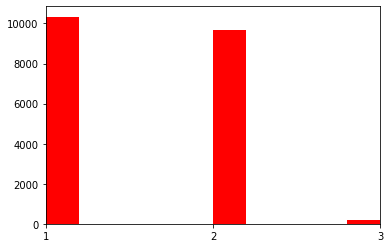

In [117]:
plt.hist(X_train["monthOfIncident"],color='red')

plt.xlim(1, 3)
plt.xticks([1, 2, 3])

#### Only 3 months are featured in this case and january and feburary are mostly dominated the whole year. It's better to treat month in this case as a categorical feature. 

##### can drop date of Policy coverage since it has 0 correlation with the reported fraud from correlation Matrix

#### can drop year of incident since all of them happened in  2015

In [118]:
X_train=X_train.drop(['DateOfPolicyCoverage'],axis=1)
X_test=X_test.drop(["DateOfPolicyCoverage"],axis=1)

In [119]:
X_train=X_train.drop(['yearOfIncident'],axis=1)
X_test=X_test.drop(["yearOfIncident"],axis=1)

#### 3) Convert Policy_CombinedSingleLimit into a ratio

In [120]:
X_train["Policy_CombinedSingleLimit"][0]

'100/300'

In [121]:
X_train['Policy_CombinedSingleLimit'] = X_train['Policy_CombinedSingleLimit'].str.split('/')
X_train['Policy_CombinedSingleLimit'] = X_train['Policy_CombinedSingleLimit'].apply(lambda x: int(x[0]) / int(x[1]))


In [122]:
X_test['Policy_CombinedSingleLimit'] = X_test['Policy_CombinedSingleLimit'].str.split('/')
X_test['Policy_CombinedSingleLimit'] = X_test['Policy_CombinedSingleLimit'].apply(lambda x: int(x[0]) / int(x[1]))


#### 4. Rather than using VehicleYOM, it would be more appropriate to get vehicle age in years. To get the age of vehicle : 2015 (year of incident) - year of manufacture (VehicleYOM)

In [123]:
X_train['VehicleYOM'] = X_train['VehicleYOM'].astype(int)

In [124]:
X_test['VehicleYOM'] = X_test['VehicleYOM'].astype(int)

In [125]:

# Subtract 2015 from every value in the 'VehicleYOM year' column
X_train['VehicleYOM'] = 2015 - X_train['VehicleYOM']


X_test['VehicleYOM'] = 2015 - X_test['VehicleYOM']


In [126]:
X_train["VehicleYOM"]

17250    20
26387     3
14505     2
14460    12
17185     0
         ..
6087     19
7763     17
22309     4
9047      4
19769    18
Name: VehicleYOM, Length: 20185, dtype: int64

#### 4) Use one-hot encoding for categorical data

In [127]:
# Gathering all categorical feautures
categorical_features = ['TypeOfIncident', 'TypeOfCollission',
       'AuthoritiesContacted','IncidentState','IncidentCity',
        'PropertyDamage','day_name',
       "PoliceReport", 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'InsurancePolicyState',
       'InsuredRelationship', 'VehicleMake', 'monthOfIncident']


In [128]:
columns = X_train.columns

In [129]:
#numerical_features = list(set(columns))-set(categorical_features)



numerical_features = [col for col in columns if col not in categorical_features]
print(numerical_features)

['SeverityOfIncident', 'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge', 'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod', 'Policy_CombinedSingleLimit', 'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit', 'VehicleYOM']


In [130]:
X_train= pd.get_dummies(X_train, columns=categorical_features)


In [131]:
X_test=pd.get_dummies(X_test,columns=categorical_features)

In [132]:
X_train_columns=X_train.columns

In [133]:

X_train['AmountOfTotalClaim'] = pd.to_numeric(X_train['AmountOfTotalClaim'], errors='coerce')

X_train['Witnesses'] =pd.to_numeric(X_train['Witnesses'], errors='coerce')


In [134]:
# Select the first 50 columns
checkcorr1 = X_train[numerical_features]

# Print the selected columns
checkcorr1.head(10)

,SeverityOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM
17250,4,21,3,1,1,75850,6979,13958,54913,31,0,-43800,45,0.500000,500,1955.00,0,20
26387,3,10,1,2,3,88748,14169,10035,64544,39,44200,0,232,0.500000,1764,726.73,0,3
14505,1,4,1,1,2,3723,630,372,2721,28,0,-66000,88,0.500000,1000,840.18,0,2
14460,4,17,1,1,2,42534,3749,6680,32105,28,43000,0,71,0.333333,1000,1145.86,536861,12
17185,4,13,3,1,1,51200,11362,5681,34157,45,51500,0,292,0.333333,993,1119.72,0,0
10549,3,20,3,1,2,69978,11720,11720,46538,52,51500,0,386,0.333333,1500,1039.25,2501777,7
18086,4,15,1,0,2,46646,6815,8851,30980,53,0,-44800,381,0.500000,1622,1243.61,0,8
3801,2,17,1,1,2,69275,9222,13345,46708,43,0,0,261,0.500000,724,1300.20,0,8
16186,2,15,1,0,2,78024,14822,7411,55791,48,0,-34600,275,0.333333,864,1232.20,0,13
18529,3,19,1,0,1,74250,12334,12432,49484,30,0,-73900,86,0.250000,996,1450.51,0,9


In [135]:
checkcorr1['ReportedFraud'] = y_train

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


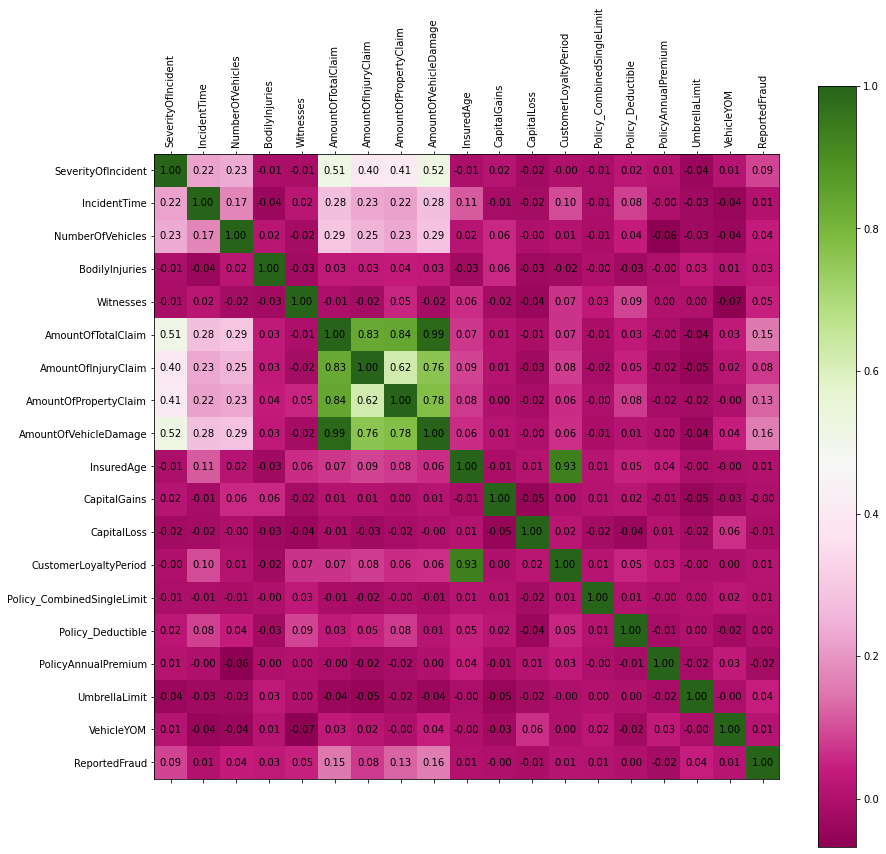

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(checkcorr1.values.T)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(14, 14))

# Create a heatmap of the correlation matrix
cax = ax.matshow(correlation_matrix, cmap='PiYG')

# Add colorbar
cbar = fig.colorbar(cax)

# Set tick labels and rotation
ax.set_xticks(np.arange(len(checkcorr1.columns)))
ax.set_yticks(np.arange(len(checkcorr1.columns)))
ax.set_xticklabels(checkcorr1.columns, rotation=90)
ax.set_yticklabels(checkcorr1.columns)

# Add correlation values
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        text = ax.text(j, i, f'{correlation_matrix[i, j]:.2f}', ha='center', va='center', color='black')

# Show the plot
plt.show()

In [137]:
all_column_names=X_train.columns

In [138]:
columns_to_check = ['InsuredAge','CustomerLoyaltyPeriod','AmountOfTotalClaim','AmountOfInjuryClaim','NumberOfVehicles', 'PoliceReport_NO',
       'PoliceReport_YES','PoliceReport_unknown', 'PolicyAnnualPremium',
       'Policy_Deductible', 'PropertyDamage_NO', 'PropertyDamage_YES',
       'PropertyDamage_unknown', 'SeverityOfIncident',
       'TypeOfCollission_Front Collision', 'TypeOfCollission_Rear Collision',
       'TypeOfCollission_Side Collision','Witnesses', 'CapitalGains'
                   ]

In [139]:
X_train

,SeverityOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,...,VehicleMake_Mercedes,VehicleMake_Nissan,VehicleMake_Saab,VehicleMake_Subaru,VehicleMake_Suburu,VehicleMake_Toyota,VehicleMake_Volkswagen,monthOfIncident_1,monthOfIncident_2,monthOfIncident_3
17250,4,21,3,1,1,75850,6979,13958,54913,31,...,0,0,0,0,0,0,0,0,1,0
26387,3,10,1,2,3,88748,14169,10035,64544,39,...,0,0,0,0,0,0,0,1,0,0
14505,1,4,1,1,2,3723,630,372,2721,28,...,0,1,0,0,0,0,0,1,0,0
14460,4,17,1,1,2,42534,3749,6680,32105,28,...,0,0,0,0,0,0,0,1,0,0
17185,4,13,3,1,1,51200,11362,5681,34157,45,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,2,21,1,2,3,54057,9626,9626,34805,39,...,0,0,0,0,0,0,0,0,1,0
7763,4,14,1,2,1,75753,7686,15056,53011,42,...,0,0,0,0,0,0,1,1,0,0
22309,3,1,1,1,0,111111,17094,17094,76923,41,...,0,0,0,0,1,0,0,0,1,0
9047,3,16,1,2,1,55373,5537,5537,44299,44,...,0,0,0,0,0,1,0,0,1,0


#### Now we deal with InsuredAge and CustomerLoyaltyPeriod which is highly correlated >90% 

Customer Loyalty period and insured age is highly correlated. just need to select one of the featuere to be predicted

#### Amount of Vehicle Damage and amount of Total claim are highly correlated.  (0.99) Can drop eithr of them..

In [140]:
X_test_columns = X_test.columns

In [141]:
set1 = set(X_train.columns)
set2 = set(X_test.columns)

# Find the elements present in list1 but missing in list2
missing = set1 - set2

print(missing)

{'VehicleMake_Subaru', 'VehicleMake_Acura'}


In [142]:
X_test['VehicleMake_Subaru'] = 0

In [143]:
X_test['VehicleMake_Acura']=0

###  e) Rescaling if necessary if necessary 

#### Rescaling all numerical data

In [144]:
print(numerical_features)




['SeverityOfIncident', 'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge', 'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod', 'Policy_CombinedSingleLimit', 'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit', 'VehicleYOM']


In [145]:
from sklearn.preprocessing import MinMaxScaler



# To scale all data between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))

# Rescale the selected columns
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])


In [146]:
X_test[numerical_features] = scaler.fit_transform(X_test[numerical_features])


In [147]:
X_test.head(10)

,SeverityOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,...,VehicleMake_Nissan,VehicleMake_Saab,VehicleMake_Suburu,VehicleMake_Toyota,VehicleMake_Volkswagen,monthOfIncident_1,monthOfIncident_2,monthOfIncident_3,VehicleMake_Subaru,VehicleMake_Acura
3673,0.333333,-0.913043,0.333333,0.0,0.333333,0.345129,0.534595,0.039246,0.235471,-0.500000,...,1,0,0,0,0,1,0,0,0,0
10230,0.333333,0.043478,-0.333333,0.0,1.000000,-0.011130,-0.331626,-0.467324,0.100486,0.000000,...,0,0,0,0,0,0,1,0,0,0
6097,-0.333333,0.739130,-1.000000,0.0,-0.333333,-0.298735,-0.219329,-0.644277,-0.293004,-0.136364,...,0,0,0,0,0,1,0,0,0,0
2836,1.000000,0.478261,-1.000000,1.0,-1.000000,-0.019841,-0.374022,-0.458247,0.096563,-0.045455,...,0,0,0,0,0,1,0,0,0,0
9848,-0.333333,0.652174,-1.000000,-1.0,-0.333333,0.415431,-0.226348,-0.294865,0.637896,-0.545455,...,0,0,0,0,0,1,0,0,0,0
24100,0.333333,-0.130435,0.333333,1.0,0.333333,0.116241,-0.102670,0.057227,0.069733,0.000000,...,0,0,0,0,0,1,0,0,0,0
12248,-0.333333,-0.652174,0.333333,1.0,-0.333333,0.273040,-0.364253,0.158887,0.336210,-0.545455,...,0,0,0,0,0,0,1,0,0,0
19011,-0.333333,0.304348,0.333333,1.0,1.000000,-0.344323,-1.000000,-0.610131,-0.160499,0.181818,...,0,0,0,0,0,1,0,0,0,0
13588,1.000000,0.739130,0.333333,1.0,-1.000000,-0.035300,-0.085503,-0.485304,0.005164,-0.181818,...,0,0,0,0,0,1,0,0,0,0
16613,-0.333333,-0.913043,1.000000,0.0,0.333333,0.245171,0.156163,-0.362033,0.309608,0.272727,...,0,0,0,0,0,1,0,0,0,0


#### Sort columns in alphabetical order for both training and test data

In [148]:
X_train = X_train.sort_index(axis=1)

In [149]:
X_test=X_test.sort_index(axis=1)

### (f) We now need to use PCA to deal with highly correlated features and for dimensionality reduction . From the previous correlation matrix, we see how a few parameters are highly correlated with correlation coefficient as high as 0.9!



Text(0, 0.5, 'CustomerLoyaltyPeriod')

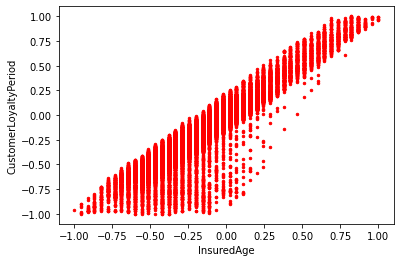

In [150]:
x=X_train["InsuredAge"]
y=X_train["CustomerLoyaltyPeriod"]
plt.scatter(x,y,color='red',s=6)

plt.xlabel("InsuredAge")
plt.ylabel("CustomerLoyaltyPeriod")


Text(0, 0.5, 'AmountOfPropertyClaim')

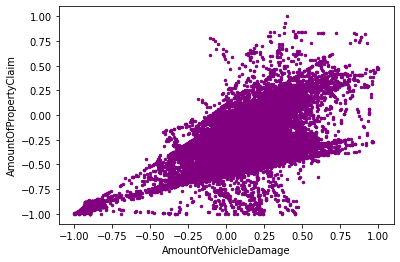

In [151]:
X_train['AmountOfTotalClaim'] = X_train['AmountOfTotalClaim'].astype(float)


x=X_train["AmountOfVehicleDamage"]
y=X_train["AmountOfPropertyClaim"]

plt.scatter(x,y,color='purple',s=6)

plt.xlabel("AmountOfVehicleDamage")
plt.ylabel("AmountOfPropertyClaim")


Text(0, 0.5, 'AmountOfInjuryClaim')

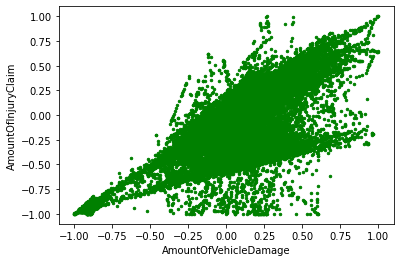

In [152]:
x=X_train["AmountOfVehicleDamage"]
y=X_train["AmountOfTotalClaim"]

plt.scatter(x,y,color='green',s=6)


x=X_train["AmountOfVehicleDamage"]
y=X_train["AmountOfInjuryClaim"]

plt.scatter(x,y,color='green',s=6)

plt.xlabel("AmountOfVehicleDamage")
plt.ylabel("AmountOfInjuryClaim")

In [153]:
columns_to_reduced=['AmountOfVehicleDamage',
                    "AmountOfPropertyClaim","AmountOfInjuryClaim","AmountOfTotalClaim"]


X_train_pcab=X_train[columns_to_reduced]

X_test_pcab=X_test[columns_to_reduced]

X_test_pcab.head()



,AmountOfVehicleDamage,AmountOfPropertyClaim,AmountOfInjuryClaim,AmountOfTotalClaim
3673,0.235471,0.039246,0.534595,0.345129
10230,0.100486,-0.467324,-0.331626,-0.011130
6097,-0.293004,-0.644277,-0.219329,-0.298735
2836,0.096563,-0.458247,-0.374022,-0.019841
9848,0.637896,-0.294865,-0.226348,0.415431


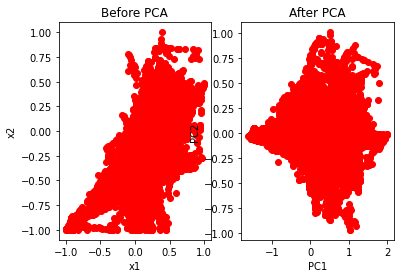

In [154]:

from sklearn.decomposition import PCA


pca = PCA(n_components=2) # estimate only 2 PCs
X_train_pca = pca.fit_transform(X_train_pcab) #original data

pca=PCA(n_components=2)

X_test_pca = pca.fit_transform(X_test_pcab) # project the original data into the PCA space


fig, axes = plt.subplots(1,2)
axes[0].scatter(X_train_pcab["AmountOfVehicleDamage"], X_train_pcab["AmountOfPropertyClaim"],color='red')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_train_pca[:,0], X_train_pca[:,1],color ='red')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [155]:
print(X_train_pca[:,0])

[ 0.68734834  1.12384717 -1.49676741 ...  1.88453783 -0.0128852
 -1.45744196]


In [156]:
corr_original = np.corrcoef(X_train_pcab, rowvar=False)  # Correlation matrix of original features
corr_transformed = np.corrcoef(X_train_pca, rowvar=False)  # Correlation matrix of transformed features



X_train["amountPCA1"]=X_train_pca[:,0]
X_train["amountPCA2"]=X_train_pca[:,1]

X_test["amountPCA1"]=X_test_pca[:,0]
X_test["amountPCA2"]=X_test_pca[:,1]


print(columns_to_reduced)
X_train=X_train.drop(['AmountOfVehicleDamage'],axis=1)
X_test=X_test.drop(['AmountOfVehicleDamage'],axis=1)

X_train=X_train.drop(['AmountOfPropertyClaim'],axis=1)
X_test=X_test.drop(['AmountOfPropertyClaim'],axis=1)

X_train=X_train.drop(['AmountOfInjuryClaim'],axis=1)
X_test=X_test.drop(['AmountOfInjuryClaim'],axis=1)

X_train=X_train.drop(['AmountOfTotalClaim'],axis=1)
X_test=X_test.drop(['AmountOfTotalClaim'],axis=1)

['AmountOfVehicleDamage', 'AmountOfPropertyClaim', 'AmountOfInjuryClaim', 'AmountOfTotalClaim']


In [157]:
columns=["InsuredAge","CustomerLoyaltyPeriod"]

X_train_pca3= X_train[columns]

X_test_pca3=X_test[columns]

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_train_pca3)

X_pca_test = pca.fit_transform(X_test_pca3)

X_train['Age_Loyalty']=X_pca

X_test["Age_Loyalty"]=X_pca_test

X_train=X_train.drop(['InsuredAge'],axis=1)
X_test=X_test.drop(['InsuredAge'],axis=1)

X_train=X_train.drop(['CustomerLoyaltyPeriod'],axis=1)
X_test=X_test.drop(['CustomerLoyaltyPeriod'],axis=1)

In [158]:
pca_columns=['Age_Loyalty',"amountPCA1","amountPCA2"]

In [159]:
scaler = MinMaxScaler(feature_range=(-1, 1))

# Rescale the selected columns
X_train[pca_columns] = scaler.fit_transform(X_train[pca_columns])

In [160]:
X_test[pca_columns]=scaler.fit_transform(X_test[pca_columns])

<function matplotlib.pyplot.show(close=None, block=None)>

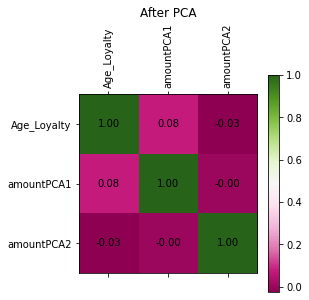

In [161]:
checkcorr = X_train[pca_columns]

correlation_matrix = checkcorr.corr()


fig, ax = plt.subplots(figsize=(4, 4))


cax = ax.matshow(correlation_matrix, cmap='PiYG')


cbar = fig.colorbar(cax)


ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)


for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha='center', va='center', color='black')


ax.set_title('After PCA')

plt.show

### (f) I notice that the dataset has a severe class imbalance issues. I have chosen to undersample the majority class to increase model accuracy and prevents overfitting. 

In [162]:

from sklearn.utils import resample

# combine X_train and y_train in a single data
train_xy = pd.concat([X_train, y_train], axis=1)

major = train_xy[train_xy['ReportedFraud'] == 0]
minor = train_xy[train_xy['ReportedFraud'] == 1]

### use resample to downsample the majority class so as to prevent overfitting (oversample minority class might introduce overfitting)

majority_new = resample(major,replace=False,  n_samples=len(minor),  random_state=42)

train_balanced = pd.concat([majority_new, minor])


X_train_balanced = train_balanced.drop('ReportedFraud', axis=1)
y_train_balanced = train_balanced['ReportedFraud']

In [163]:
X_train_balanced = X_train_balanced.sort_index(axis=1)

X_test= X_test.sort_index(axis=1)

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process

100-200 words

I have chosen firstly to use Random Forest because it is an ensemble method and would work well with data that consist of both categorical and numerical features. Below are some of the reasons why I choose Random Forest to classify my data:

1. Random Forest can automatically consider different splits based on different categorical thresholds. This will work well if I have a lot of numerical data and won't have to manually adjust the best splits by calculating individual information Gain or Gini index. Random Forest will automatically optimise these steps for me. For categorical data, Random Forest also evaulates all possible splits and choose the best splits (highest information gain and lowest impurity) for me.  

2. Random Forest is an ensemble method and hence it is robust to outliers and noisy data. It is a combination of multiple decision trees. 


3. Random Forest consist of bagging or bootstrap which reduces the chances of overfitting. Refer to steps in Random Forest for my explanations. 

4. Random Forest is also very robust against outliers and it is often very good when the data is complex.

#### Steps in Random Forest (Bootstrapping + Aggregating = Bagging) :

1. Bootstrapped Dataset : Randomly select data from your training data. you are allowed to pick the same dataset more than once.

2. Create a decision trees for each of the randomly selected dataset.Randomly select features to be used in this decision trees (NOT all of the features)

3. Repeat steps 1 and 2 for many times. Each tree will look very different, a variety of trees

4. Check result for each trees we made, for binary classification, it will be a yes/no. We gather results for all the trees and if majority is yes, we classify the instance as yes. This is Majority voting.   




### b) Setting hyper parameters with rationale

#### Explanation for some of the important parameters to tune and what these parameters mean 

1) Max_features: max_featuers are the maximum features each decision tree is allowed to use in the random forest. It is often good to start with either sqrt of the number of features or log2 of the total number of features. The sqrt  for each split provides a good trade-off between exploring a diverse range of features and preventing individual trees from getting too complex and highly correlated. The log2 rule is for slightly less complex models, since sqrt(100) > log2(100). However, it will be a good idea to explore any integer between the two. Or try smaller max_features like 2, 3 if the data is very prone to overfitting. Max_features can help to prevent overfitting by limiting the number of features considered at each split.  

2) Max_Depth: Maximum Depth of decision trees (Max_Depth). Max_depth is to specify the maximum depth of each decision tree in a random forest. It is dependent on the number of features we have. Since we have a lot of features, we may use a larger max_depth. But we can always start with the smaller number and increase slowly to check performance. If max_depth is too small even though the features is larage and complex, then it can lead to underfitting. Very large max_depth can lead to overfitting. We should tune this in CV.

3) n_estimators: Number of decision trees in a random forest. (n_estimators) n_estimators means how many decision trees are in a random forest. There are pros and cons to having a large n_estimators. The pros include increase in robustness against overfitting since more trees are considered, increase accuracy since more trees mean more likely the important features are taken into consideration and finally it can build a model that is better at generalisation. The cons are the expensive computational cost and diminishing returns where increasing number of trees can no longer increase performance. 

4) min_samples_split is the minimum number of samples required to split a node further into child node. A higher number will prevent accuracy but too high a value may cause the model to be underfitting and not reach its full potential. Generally, it will work together with the max_depth to control overfitting. The default is 2. 

5) min_samples_leaf is the minimum number of samples required to be a leaf node. Setting a minimum number can prevent overfitting since it will prevent the tree from growing further once a specific size is reach. 





#### Import necessary libraries and setting inital guess for hyperparameters to check model performance

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score


## I tried default log2 because it is a good trade off between diversity of features and complexity of trees.
## I will tune this further later

max_features='log2'## typically, max_features should be sqrt of number of features or log2 of the features


### I have quite a lot of features 126, so starting with 20 of max_depth is a decent number and will increase later
### if accuracy is too low

max_depth=20 

###
n_estimators= 1000

### I will try the default value for sample split and sample leaf and look at the performance for comparison
min_samples_split=2

min_samples_leaf=1

scoring_metric = make_scorer(balanced_accuracy_score)

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=2, min_samples_leaf=1, class_weight=None, random_state=42)

rf_classifier.fit(X_train_balanced, y_train_balanced)

y_pred= rf_classifier.predict(X_test)

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy Score:", balanced_acc)

Balanced Accuracy Score: 0.8948549469083178


### c) Optimising hyper parameters

#### I have chosen to use hyperparrameters GridSearchCV to systematically  tune different combination of hyperparameters.

In [165]:
from sklearn.model_selection import GridSearchCV

rf_gs = RandomForestClassifier()
parameter_space = {
    'n_estimators': [1200,1600],
    'max_depth': [10,40],
    'max_features' : [4,'log2'],
    'min_samples_split':[2,4],
}


clf_rf = GridSearchCV(rf_gs, parameter_space, n_jobs=-1, cv=5)
clf_rf.fit(X_train_balanced, y_train_balanced) # X is train samples and y is the corresponding labels

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 40], 'max_features': [4, 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [1200, 1600]})

In [166]:
print("Best Hyperparameters for randomforest:", clf_rf.best_params_)  

Best Hyperparameters for randomforest: {'max_depth': 40, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 1600}


#### We can now feed the hyperparameters into the model!

In [167]:
from sklearn.metrics import make_scorer, balanced_accuracy_score

n_estimators=1600

max_depth=40

scoring_metric = make_scorer(balanced_accuracy_score)

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_features=3, max_depth=max_depth, min_samples_split=2, min_samples_leaf=1, class_weight=None, random_state=42)


rf_classifier.fit(X_train_balanced, y_train_balanced)

y_pred = rf_classifier.predict(X_test)

balanced_acc = balanced_accuracy_score(y_test, y_pred)

print("Balanced Accuracy Score:", balanced_acc)

Balanced Accuracy Score: 0.9000275558845541


### Indeed we have an improved performance after GridSearchCV with score of 90.02%!!!!

### d) Performance metrics for training


1) Confusion Matrix

2) Learning Curve

3) Choose balanced accuracy, f1 score and recall


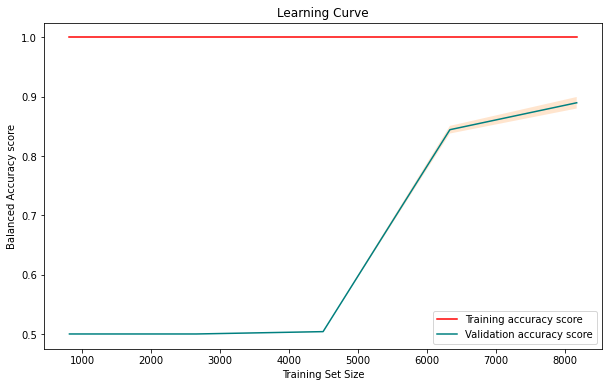

In [168]:
from sklearn.metrics import make_scorer, balanced_accuracy_score


train_sizes, train_scores, test_scores = learning_curve(rf_classifier, X_train_balanced, y_train_balanced, cv=4, scoring=scoring_metric, n_jobs=-1)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy score', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation accuracy score',color='teal')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Balanced Accuracy score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()



### Confusion Matrix

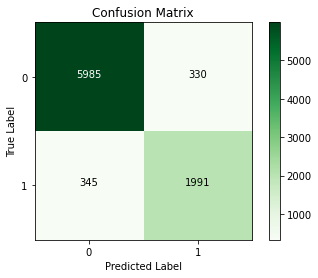

In [169]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)


plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

### Balanced Accuracy

In [170]:
rf_classifier.fit(X_train_balanced, y_train_balanced)

y_pred = rf_classifier.predict(X_test)

balanced_acc = balanced_accuracy_score(y_test, y_pred)

print("Balanced Accuracy Score:", balanced_acc)

Balanced Accuracy Score: 0.9000275558845541


### f1 score

In [171]:
from sklearn.metrics import make_scorer,f1_score

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)

print("F1-score on test data:", f1)

F1-score on test data: 0.8550569035859996


### Recall and Precision

In [172]:
from sklearn.metrics import recall_score, precision_score

# Example ground truth and predicted labels

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

print("Recall:", recall)
print("Precision:", precision)

Recall: 0.8523116438356164
Precision: 0.8578199052132701


In [173]:
labels=['balanced_acc','f1score','recall','precision']

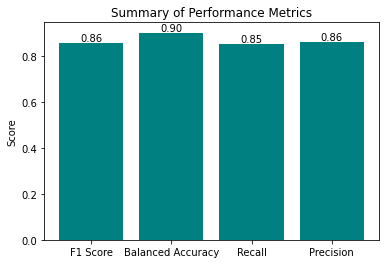

In [174]:
import matplotlib.pyplot as plt



# Labels for the metrics
labels = ['F1 Score', 'Balanced Accuracy', 'Recall', 'Precision']

# Scores for the metrics
scores = [f1, balanced_acc, recall, precision]




# Plot the bar graph
plt.bar(labels, scores, color='teal')

for i, v in enumerate(scores):
     plt.text(i, v, "{:.2f}".format(v), ha='center', va='bottom')

plt.ylabel('Score')
plt.title('Summary of Performance Metrics')


plt.show()

### b) Setting hyper parameters with rationale

1. n_neighbors, Refer to previous column figure 2. We can see that the more nearest neighbours are considered, the less complex and more **smooth** the decision boundary look. A large k can also prevent overfitting by decreasing the variance. However, with too high a k value, model can be bias and fails to capture intricate details in the data. 

2. leaf_size maximum number of samples that can be stored in a leaf node of the underlying data structure, such as a KD-tree or Ball tree. Smaller leaf size can lead to more accurate search but it is computationally expensive but a bigger leaf size is fast but can sacrifice accuracy of search.

3. Algorithm : there is auto, kDTree, Ball tree or brute force are some of the exampls to choose from. kDTree partition points recursively into smaller regions basaed on feature values. Ball Tree partition points into spherical nested balls. It data is partitioned based on the distance away from the centre of the points of the 'ball'. Brute force method is use directly calculate all pair wise distances between the data points. 

4. Weights: Weights determine how you weigh each neighbours. 'Uniform' is the most popular choice and it gives all neighbours equal weights. 'distance' meaning that it will weigh the neighbour by distance away from the point. 


5. p refers to the way you calculate distances. p=1 is the Manhattan distance, it refers to absolute distance. p=2 is the euclidean distance and it calculates the straght line distance between two points.
Manhattan distance =  |x1 - x2| + |y1 - y2| + |z1 - z2|
Euclidean distance =  sqrt((x1 - x2)^2 + (y1 - y2)^2 + (z1-z2)^2





References for this section : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

#### Initial Parameters

n_neighbours = 4 # choose a moderate one 

leaf_size = 20

algorithm = 'kd_tree' #we have a tabular data with lots of categorical features, i think kdtree is more suitable than ball tree

# maybe ball tree is better for clustering data like geophysical data 

knn = KNeighborsClassifier(n_neighbors=4,leaf_size=20,weights='uniform', 
                           p=1, algorithm='kd_tree')

# Fit the classifier to the training data
knn.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test data
predictions = knn.predict(X_test)

# Calculate the balanced accuracy score
accuracy = balanced_accuracy_score(y_test, predictions)

# Print the accuracy score
print("Balanced Accuracy Score:", accuracy)

Balanced Accuracy Score: 0.9034416384667947


### c) Optimising hyper parameters, The above accuracy can be improved with more optimised hyperparameters (GridSearchCV)

In [176]:
from sklearn.model_selection import GridSearchCV

knn_gs = KNeighborsClassifier()
parameter_space = {
    'n_neighbors': [3,6],
    'weights': ['uniform','distance'],
    'p' : [1,2]
}


clf_knn = GridSearchCV(knn_gs, parameter_space, n_jobs=-1, cv=5)
clf_knn.fit(X_train_balanced, y_train_balanced) # X is train samples and y is the corresponding labels

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 6], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [177]:
print("Best Hyperparameters:", clf_knn.best_params_)  

Best Hyperparameters: {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


#### Nice, next i can use the best hyperparameters to feed into my model!

In [178]:


knn = KNeighborsClassifier(n_neighbors=10,leaf_size=40,weights='uniform', 
                           p=1, algorithm='kd_tree')

# Fit the classifier to the training data
knn.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test data
predictions = knn.predict(X_test)

# Calculate the balanced accuracy score
balanced_acc_knn = balanced_accuracy_score(y_test, predictions)

# Print the accuracy score
print("Balanced Accuracy Score:", balanced_acc_knn)

Balanced Accuracy Score: 0.9071360250653477


### Finally We have achieved 90.07 % with the help of GridSearchCV!!!

### d) Performance metrics for training


1) Confusion Matrix

2) Choose balanced accuracy, f1 score and recall

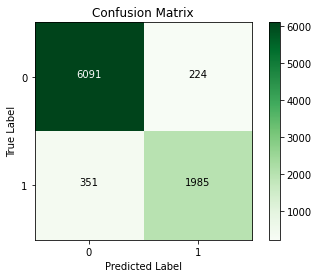

In [179]:
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add labels to the cells
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

In [180]:
balanced_acc = balanced_accuracy_score(y_test, predictions)

print("Balanced Accuracy Score:", balanced_acc)


# Calculate the F1-score
f1_knn = f1_score(y_test, predictions)

print("F1-score on test data:", f1)


from sklearn.metrics import recall_score, precision_score

# Example ground truth and predicted labels

# Calculate recall
recall_knn = recall_score(y_test, predictions)

# Calculate precision
precision_knn = precision_score(y_test, predictions)

print("Recall:", recall)
print("Precision:", precision)

Balanced Accuracy Score: 0.9071360250653477
F1-score on test data: 0.8550569035859996
Recall: 0.8523116438356164
Precision: 0.8578199052132701


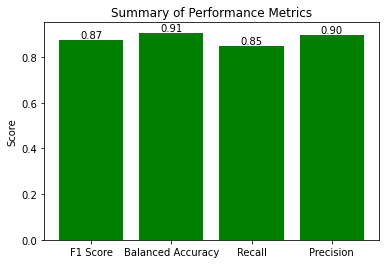

In [181]:
import matplotlib.pyplot as plt

# Labels for the metrics
labels = ['F1 Score', 'Balanced Accuracy', 'Recall', 'Precision']

# Scores for the metrics
scores = [f1_knn, balanced_acc_knn, recall_knn, precision_knn]
# Plot the bar graph
plt.bar(labels, scores, color='green')

for i, v in enumerate(scores):
     plt.text(i, v, "{:.2f}".format(v), ha='center', va='bottom')

plt.ylabel('Score')
plt.title('Summary of Performance Metrics')


plt.show()

### Discuss your motivation for choosing the technique and  provide a schematic figure of the process

100-200 words

I have chosen to use multiple Layer perceptrons for this. MLP is very versatile and can deal with very complex model with many features.


The number of features present is large and can be rather complex. MLP (neural network) might be able to deal with this situation. 

The general structure of MLP includes an input layer, hidden layer (can be tuned) and also a final output later. 

Furthermore, it is commonly known that tabular data often performs worse when passed through neural network. I want to use MLPs as a comparison with the previous 2 models. 


Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters with rationale



#### We want to first select the hyperparameters that are important for us to set. 


1. Learning rate: needs to be tuned as default is 0.01. Learning_rate should be adjusted which affects how fast the iterations reach the optimum result. 



2. Optimiser: 'SGD' or 'ADAM'. Stochastic Gradient Descent is the most basic optimiser and often does not work so well with small learning rate. This is due to vanilla SGD lacks momentum and can often be hard to escape saddle point. I will use ADAM instead because it is versatile for different problems, handle saddle points better than SGD. 


3. Loss function:  Defult of loss function in MLP is Cross-entropy


4. Activation function chosen is Relu to avoid extinguishing gradient problem (citation needed). However, the last layer needs to be sigmoid of logistics ]


5. No of neutrons in each layer can be tuned, depending on the number of features. Increase the no. of neutrons can increase the complexity of the model. If we have a lot of features that are all important for predictions, we need more number of neutrons. The first rule of thumb to start with is to select a number between the number of input features to the number of output clases. For a binary classification, it is 2. 


6. Early Stopping : Early stopping needs to be applied sometimes to prevent overfitting. Early stopping will help the model to stop until there is not much improvement in loss values or accuracy score. 





##### ReLU activaion function:
 $ReLU=MAX(0, x) $


##### Sigmoid activaion function:

##### $\frac{1} { (1 + exp^{-x})} $



In [182]:
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

In [183]:
learning_rate=0.001


mlp_classifier = MLPClassifier(hidden_layer_sizes=(150,), solver='adam',
                    learning_rate_init=learning_rate,verbose=True,
                    early_stopping=True,
                    random_state=42,
                    activation=['relu'])




In [184]:
from sklearn.model_selection import GridSearchCV

mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(100,40),(100,30),(50,50)],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}



clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)

clf.fit(X_train, y_train) 


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(100, 40), (100, 30), (50, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

### d) Performance metrics for training

In [185]:
learning_rate=0.001


mlp_classifier = MLPClassifier(hidden_layer_sizes=(122,), solver='adam',
                    learning_rate_init=learning_rate,verbose=False,
                    early_stopping=True,
                    random_state=42,
                    alpha=0.01,
                    activation='relu')


#mlp_classifier.out_activation_ = 'logistic'


In [186]:
mlp_classifier.fit(X_train_balanced, y_train_balanced)

# Predict the labels for the test data
y_pred_mlp = mlp_classifier.predict(X_test)



# Evaluate the performance of the classifier on the test data
accuracy = mlp_classifier.score(X_test, y_test)

# Print the predicted labels and accuracy
print("Predicted labels:", y_pred_mlp)
print("Accuracy:", accuracy)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.frame

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Predicted labels: [0 1 0 ... 0 1 1]
Accuracy: 0.8390937463877008


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [187]:
balanced_accuracy_score(y_test, y_pred_mlp)


0.8382679719953579

### MLP is a lot worse in performance than the other two methods with only 82.96% accuracy

## 6. Comparison of metrics performance for testing (16 marks)



### a) Use of cross validation for both techniques to deal with over-fitting

#### Overfitting occurs when model becomes too complex. It may performs extremely well in training data but on unseen test data, it performs worse. Hence, Cross Validation can deal with overfitting by testing models on test data to re-adjust model complexity.

In [188]:
import pandas as pd

# Assuming X_train and X_test are pandas DataFrames
X_combined = pd.concat([X_train_balanced, X_test], axis=0, ignore_index=True)

y_combined = pd.concat([y_train_balanced, y_test],axis=0,ignore_index = True)


In [189]:
from sklearn.model_selection import cross_val_score

scoring_metric = make_scorer(balanced_accuracy_score)



# Perform cross-validation and obtain the scores for each model
cv_scores_model1 = cross_val_score(rf_classifier, X_combined, y_combined, cv=12, scoring=scoring_metric)
cv_scores_model2 = cross_val_score(knn, X_combined, y_combined, cv=12, scoring=scoring_metric)

# Print the average scores for each model
print("Raddom forest:", cv_scores_model1.mean())
print("KNN:", cv_scores_model2.mean())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum it

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum it

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum it

Raddom forest: 0.8968098465468518
KNN: 0.9099064042078394


Raddom forest: 0.8971308532237906
KNN: 0.9099786832750171

### We can check for overfitting by looking at the variance or standard deviation 

Text(0, 0.5, 'CV_scores')

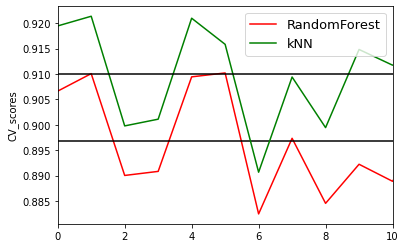

In [190]:
plt.plot(cv_scores_model1,color='red',label='RandomForest')


plt.hlines(cv_scores_model1.mean(), 0, 10, color='black')

plt.plot(cv_scores_model2,color='green',label='kNN')

plt.hlines(cv_scores_model2.mean(),0,10, color='black')

plt.xlim(0,10)

plt.legend(fontsize=13)
plt.ylabel('CV_scores')

### The black line is the average to guide us in looking at the average scores for each model.

In [191]:
print("Raddom forest:", cv_scores_model1.std())

print("KNN:", cv_scores_model2.std())

Raddom forest: 0.009745200861732342
KNN: 0.009519961723239637


####  Random forest is slightly more overfitting than KNN from the higher standard deviation/variance

### b) Comparison with appropriate metrics for testing

In [192]:
scoring_metric = make_scorer(balanced_accuracy_score)



# Perform cross-validation and obtain the scores for each model
cv_scores_model1_ba = cross_val_score(rf_classifier, X_combined, y_combined, cv=6, scoring=scoring_metric)
cv_scores_model2_ba = cross_val_score(knn, X_combined, y_combined, cv=6, scoring=scoring_metric)


In [193]:
scoring_metric = make_scorer(f1_score)



# Perform cross-validation and obtain the scores for each model
cv_scores_model1_f1 = cross_val_score(rf_classifier, X_combined, y_combined, cv=6, scoring=scoring_metric)
cv_scores_model2_f1 = cross_val_score(knn, X_combined, y_combined, cv=6, scoring=scoring_metric)


In [194]:
scoring_metric = make_scorer(recall_score)



# Perform cross-validation and obtain the scores for each model
cv_scores_model1_recall = cross_val_score(rf_classifier, X_combined, y_combined, cv=6, scoring=scoring_metric)
cv_scores_model2_recall = cross_val_score(knn, X_combined, y_combined, cv=6, scoring=scoring_metric)


In [195]:
scoring_metric = make_scorer(precision_score)



# Perform cross-validation and obtain the scores for each model
cv_scores_model1_precision = cross_val_score(rf_classifier, X_combined, y_combined, cv=6, scoring=scoring_metric)
cv_scores_model2_precision = cross_val_score(knn, X_combined, y_combined, cv=6, scoring=scoring_metric)


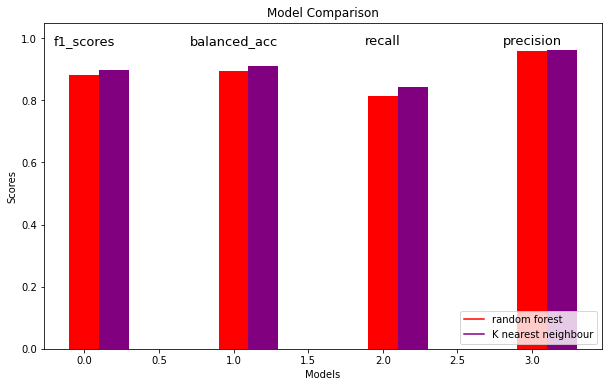

In [196]:
import matplotlib.pyplot as plt

# Data
models = ['RF', 'kNN']

f1_scores_tot = [np.mean(cv_scores_model1_f1), np.mean(cv_scores_model2_f1)]
balanced_accuracy_tot = [np.mean(cv_scores_model1_ba), np.mean(cv_scores_model2_ba)]

recall_tot = [np.mean(cv_scores_model1_recall), np.mean(cv_scores_model2_recall)]

precision_tot = [np.mean(cv_scores_model1_precision), np.mean(cv_scores_model2_precision)]


typesofscores=[f1_scores_tot, balanced_accuracy_tot, recall_tot, precision_tot]

stringscores= ['f1_scores', 'balanced_acc', 'recall', 'precision']

# Width of each bar
bar_width = 0.2

# Position of each bar on the x-axis
r1 = np.arange(len(typesofscores))
r2 = [x + bar_width for x in r1]
#label1='rf'

# Bar chart for F1 scores and balanced accuracy
plt.figure(figsize=(10, 6))

plt.plot([], [],color='red', label='random forest')

plt.plot([],[], color='purple', label='K nearest neighbour')

for i in range(len(r1)):
    plt.bar(r1[i],typesofscores[i][0],color='red', width=bar_width)
    plt.bar (r2[i],typesofscores[i][1],color='purple', width = bar_width)
    
    plt.text(i, 0.98, stringscores[i], ha='center',fontsize =13)

    
    
#plt.bar(r1, f1_scores_tot[0], color='red', width=bar_width, label='F1 Score')
#plt.bar(r2, balanced_accuracy_tot, color='purple', width=bar_width, label='Balanced Accuracy')

# X-axis ticks and labels
#plt.xticks([r + bar_width/2 for r in range(len(models))], models)

# Axis labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')

# Legend
plt.legend(loc = 'lower right')

# Set y-axis range from 0 to 1
plt.ylim(0, 1.05)

# Show the plot
plt.show()









##### As shown from the bar charts, interestingly, kNN out performs random forest in every scores (f1 scores, balanced accuracy and recall) other than precision after Cross Validation. 


### c) Model selection (ROC or other charts)


In [197]:
import pandas as pd


X_combined = pd.concat([X_train_balanced, X_test], axis=0, ignore_index=True)

y_combined = pd.concat([y_train_balanced, y_test],axis=0,ignore_index = True)



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.frame

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


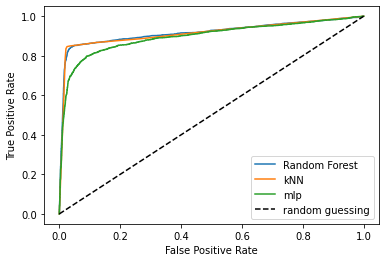

In [198]:
from sklearn import metrics

from sklearn.metrics import balanced_accuracy_score

plt.figure(0).clf()


rf_classifier.fit(X_train_balanced, y_train_balanced)
predictionrf =rf_classifier.predict_proba(X_test)[:, 1]
fpr_1, tpr_1, thresholds = metrics.roc_curve(y_test, predictionrf)
# Calculate the AUC for the first ROC curve
auc_1 = metrics.auc(fpr_1, tpr_1)
#balanced_acc = balanced_accuracy_score(y_test, y_pred)
#auc = round(metrics.balanced_accuracy_score(y_test, y_pred), 4)
plt.plot(fpr_1,tpr_1,label="Random Forest")

#fit gradient boosted model and plot ROC curve

knn.fit(X_train_balanced, y_train_balanced)
predictionsknn = knn.predict_proba(X_test)[:, 1]
fpr_2, tpr_2, threshold = metrics.roc_curve(y_test, predictionsknn)
auc_2 = metrics.auc(fpr_2, tpr_2)
#auc = round(metrics.balanced_accuracy_score(y_test, y_pred), 4)
plt.plot(fpr_2,tpr_2,label='kNN')



mlp_classifier.fit(X_train_balanced, y_train_balanced)
predictions = mlp_classifier.predict_proba(X_test)[:, 1]
fpr_3, tpr_3, threshold = metrics.roc_curve(y_test, predictions)

auc_3 = metrics.auc(fpr_3, tpr_3)
#auc = round(metrics.balanced_accuracy_score(y_test, y_pred), 4)
plt.plot(fpr_3,tpr_3,label='mlp')

plt.plot([0, 1], [0, 1], 'k--', label ='random guessing')  
#add legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


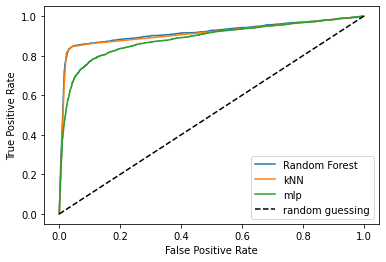

The ROC curves shows us trade off between the True Positive and False Positive rate. This is a good metric for the business problem we have since the company wants to both maximise detecting positive rate **AND** minimise falsely identifying customers as fraud. 

In [199]:
print('random forest:', auc_1, 'kNN:', auc_2, 'mlp:',auc_3)

random forest: 0.9173861701319971 kNN: 0.9151052004360134 mlp: 0.8966217095630105


#### As shown above, the area under the curve (AUC) curves are higher for random forest than kNN and MLP is the worse. The AUC shows us how good the model is at distinguishing between TP cases from FP cases. Even though previously, kNN gives very high score but RF is better at distinguishing TP from FP. 

### Now let's used our machine learning model to calculate loss incurred from incorrectly predicting the model 

### This section is to evaluate the company loss from losing customers and compare the cost for the company if they **DO NOT** use any ML model




### We can display the final result in a bar charts

## You can see, the cost for the company without using ML outweighs the cost incurred from ML errors. Conclusion, it is better to use ML even if the company lose some customers from FP.

### A note on the Bias-Variance Trade-off

Ideally, we would like our machine learning model to have low bias and low variance. In practice, it is difficult to achieve both at the same time and it is often important to find a good balance between the two. This is a particular guide when it comes to adjusting model complexity. A very complex model can lead to low bias but high variance (overfit) whereas too simple a model will lead to low variance and high bias (underfit). A bias model will fail to represent the entire dataset where a overfitted high variance model can have difficulty perform accurate prediction on Unseen data. 

Figure showing the bias-variance trade-off from reference[2] as a function of model complexity. 

References : [2]Hooman Rashidi,Nam Tran,Elham Vali Betts,Lydia P. Howell,Ralph Green,Artificial Intelligence and Machine Learning in Pathology: The Present Landscape of Supervised Methods, Academic Pathology. 2019

## 7. Final recommendation of best model (8 marks)



### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency

100-200 words

I would say from a technicle perspective, both Random Forest **AND** kNN are very good for our task (around 90% accuracy for both) with random forest perform slightly better at AUC than KNN and kNN better at accuracy score. However there are also some other considerations for choosing a model, not purely just accuracy matters: 

1. Runtime : It takes more time for Random forest during training as RF needs to construct multiple decision trees and this can cause lots of time to train. 

2. Efficiency: In terms of efficiency for very large dataset, RF outpeforms kNN in this category because RF has parallel processing ability whereas kNN compares distance between test instances with all training instances and can be computationally expensive for large dataset. However, in our data which is only 10k, computing pair-wise distances is fast and not an issue. However, as data get to 100k or more, RF definitely outperforms. 

3. In terms of overfitting, random forest is more robust against overfitting than kNN because it is an ensemble method with the voting from a wide range of decision trees. With good hyperparameter tuning and very large computational resources for GridCV to search for best hyperparameters, Random Forest is better. However, GridCV especially slow for random forest. 


4. Overfitting : Finally, it is often preferable to choose a not too complex model because as shown from previous Bias-Variance trade-off graph, too complex a model will also cause overfitting more easily. I think MLP is defintely overfitting and not too suitable for our task.


### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective

100-200 words

##### Now let's used our machine learning model to calculate loss incurred from incorrectly predicting the model 

##### This section is to evaluate the company loss from losing customers and compare the cost for the company if they **DO NOT** use any ML model

##### We are also going to come up with a Pricing model to cover the overhead cost to see how much we actually need to charge for Premium 

From the Brief:
''You need to find a way to quantify the loss incurred through losing customers because of your recommended model prediction error. For that, you need a pricing model. Take the average of all claims and assume the company gross profit must amount to double to cover the overhead of running the business as well as the claims and profit. Assume also that they have a 10% rate of claims in their customer base to find how many customers they have on average and **how much they would need to charge for each policy**. Based on this pricing model, calculate how much your model will cost them due to its error to offer them an insight into how good or bad your model will be for their business.''

Gross_Profit = 2* totalclaims


In [200]:
def get_new_totclaim (claim):
    newtotalclaims=[]
    for i in range(len(claim['AmountOfTotalClaim'])):
        if claim['AmountOfTotalClaim'].iloc[i]=='MISSEDDATA':
            totalclaim=claim['AmountOfInjuryClaim'].iloc[i]+claim['AmountOfPropertyClaim'].iloc[i]+claim['AmountOfVehicleDamage'].iloc[i]
            newtotalclaims.append(totalclaim)
        else:
            newtotalclaims.append(claim['AmountOfTotalClaim'].iloc[i])
    return newtotalclaims


totalclaims=get_new_totclaim(claim)

claim['AmountOfTotalClaim']=totalclaims

claim['AmountOfTotalClaim'].describe()

totalclaims_int = [int(string) for string in totalclaims]

In [201]:
total_claim = np.sum(totalclaims_int)-np.sum(policy['Policy_Deductible'])



In [202]:
average_claim= total_claim/len(totalclaims_int)

print(average_claim)

51193.8354834235


In [203]:
revenues = 1262*len(totalclaims_int)*10

In [204]:
print(revenues)

363910320


In [205]:
gross_profit = np.sum(totalclaims_int)*2

In [206]:
new_premium = gross_profit/(10*len(totalclaims_int))
print(new_premium)

10461.623602441392


### The new pricing model for premium should be 10461

In [207]:
total_customers = len(totalclaims_int)/0.1

print(total_customers)


false_positive = cm[0][1]
false_negative = cm[1][0] 
true_negative = cm[0][0]
true_positive = cm[1][1]

total = np.sum(cm)

total_positive = true_positive + false_negative

total_negative = false_positive + true_negative

total_frauds=np.sum(tottrain['ReportedFraud'])

before_ML_cost = average_claim * total_frauds

ML_errors_cost= new_premium*(len(totalclaims_int))*(false_positive/len(y_test))+average_claim*len(totalclaims_int)*(false_negative)/len(y_test)


cost_after_ML = before_ML_cost - ML_errors_cost


288360.0


### We can display the final result in a bar charts

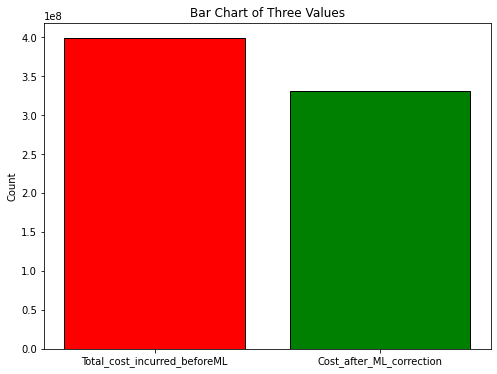

In [208]:
import matplotlib.pyplot as plt


values = [before_ML_cost, cost_after_ML]
labels = [ 'Total_cost_incurred_beforeML', 'Cost_after_ML_correction']


colors = ['red', 'green'] 


plt.figure(figsize=(8, 6))


plt.bar(labels, values, color=colors,edgecolor='black')




plt.ylabel('Count')
plt.title('Bar Chart of Three Values')


plt.show()


I would choose random forest if the company has computation resources and working on large dataset. This is because random forest has a lot of tunable hyperparameters allowing the company to maximise model accuracy and mitigate overfitting and works well for very large dataset.

However, kNN often works better for smaller and complex dataset since it does not make any assumption on data structures and linearity and can capture complex non linear relationship in data and can acheive good result with much less computation cost/model complexity than random forest does.

From the bar chart below shows the cost I saved for the company after implementing machine learning model, even after factoring in the money lost from FP cases. I calculated firstly by getting the total cost for the company to pay all fraud cases. Then I calculate the total cost of the company after implementing the Machine Learning Model.

![image.png](attachment:image.png)


Other than the previous mentioned points, Another advantage of random forest is actually its ease of interpretation. You can directly visualise the top 10 most important features in detecting fraud. Please look at the cell below:

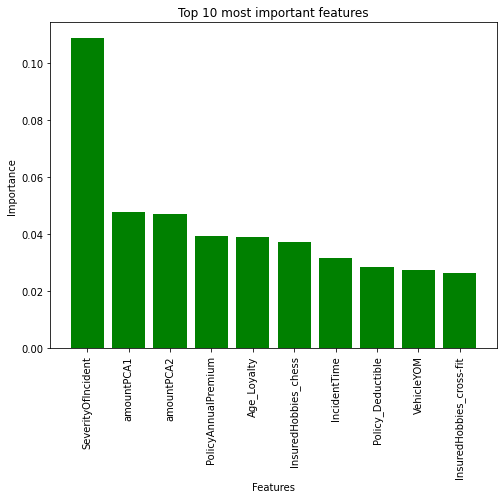

In [209]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf_classifier = RandomForestClassifier()


rf_classifier.fit(X_train_balanced, y_train_balanced)


importances = rf_classifier.feature_importances_


indices = np.argsort(importances)[::-1]

# Get the names of the features
feature_names = X_train_balanced.columns

top_feature_names = feature_names[indices][:10]
top_importances = importances[indices][:10]

plt.figure(figsize=(8, 6))
plt.title("Top 10 most important features")
plt.bar(range(len(top_feature_names)), top_importances, align="center", color='green')
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

### The above shows the top 10 most important features ranked. Severity of the Incident being most important. Maybe the company should always make sure to prioritise these 10 features when collecting customers info/survey. Maybe make these 10 features compulsory for info when customers are filling out information for claim. Amount PCA1 and Amount PCA2 are simply a combination of amount of total claim, amount of injury and vehicle damage etc(see preivous session)